# PyMogi
This demonstrates the PyMogi set of classes.

Vertical deformation (m) from a point source in an elastic half space is given by [Mogi, 1958; Segall, 2010]:
\begin{eqnarray}
U_{z, k} = \frac{ (1 - \nu)\Delta P a^3}{\mu} \frac{d}{(k^2 + d^2)^{\frac{3}{2}}}
\end{eqnarray}

where $k$ is the radial distance (m) from the center of the source, $\nu$ is Poisson's ratio, $a$ is the chamber radius (m), and $d$ is the depth of the center of the chamber (m).

Below are some examples of how to use PyMogi to calculate and plot deformation profiles.

In [36]:
import Mogi as mp
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# Create a single point source with a configuration.
poissonsRatio = 0.25
mu = 1e6 # Units
chamberRadius = 500 # meters
chamberDepth = 4e3 # meters
centerX = 0 # x coordinate in the plot
centerY = 0 # y coordinate in the plot
sourceAConfiguration = mp.MogiSourceConfig(poissonsRatio,
                                          mu,
                                          chamberRadius,
                                          chamberDepth,
                                          centerX,
                                          centerY)
sourceA = mp.MogiPoint(sourceAConfiguration)

In [38]:
# Now we set up a spatial grid, solve and plot both a 2D plot as well
# as a 1D plot
xgrid = np.linspace(-5e3,5e3,100)
ygrid = np.linspace(-5e3,5e3,100)
pressure = 5e6 # Pascals
radial1DSolution = sourceA.calculate1D(pressure,xgrid)

radial2DSolution = sourceA.calculate2D(pressure, xgrid, ygrid)

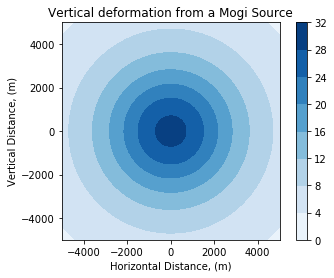

In [39]:
fig1, ax1 = plt.subplots()
cf = ax1.contourf(xgrid, ygrid,radial2DSolution, cmap=plt.cm.Blues)
ax1.set(xlabel="Horizontal Distance, (m)", ylabel='Vertical Distance, (m)',
        title='Vertical deformation from a Mogi Source')
fig1.colorbar(ccf)
ax1.set_aspect('equal', 'box')
plt.show()

In [40]:
# Then here is adding multiple sources
sourceBConfig = mp.MogiSourceConfig(0.25, 1e6, 500, 5e3, 8e3, 3e3)
sourceB = mp.MogiPoint(sourceBConfig)
pressure = 5e6 # Pascals

xgrid = np.linspace(-5e3,10e3,100)
ygrid = np.linspace(-5e3,5e3,100)

multiSource =  mp.MultipleSourceSolver(np.array([sourceA, sourceB]))
radial2DSolution = multiSource.calculate2D(pressure, xgrid, ygrid)

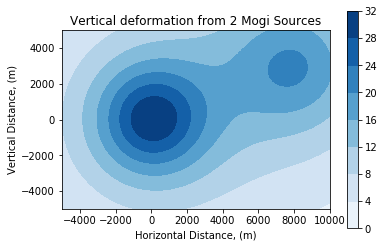

In [42]:
fig2, ax2 = plt.subplots()
cf = ax2.contourf(xgrid, ygrid,radial2DSolution, cmap=plt.cm.Blues)
ax2.set(xlabel="Horizontal Distance, (m)", ylabel='Vertical Distance, (m)',
        title='Vertical deformation from 2 Mogi Sources')
fig2.colorbar(ccf)
ax2.set_aspect('equal', 'box')
plt.show()